# Módulo 4

Disciplina: SSC5723 - Sistemas Operacionais

Grupo: gspso3 - 2020

Repositório Github: https://github.com/rogerscristo/SSC5723-gpso3

Alunos: 
- Rogers Silva de Cristo - 10355930
- Cairo Mateus Neves Ribeiro - 11925833
___

## 1.  Visão geral
Nesse módulo, um experimento de comparação entre os sistemas de arquivos `ext4`, `fat32` e `ntfs` é conduzido considerando as operações de **criação**, **leitura** e **remoção**. Para tanto, foi estipulado o total de 10 iterações para cada operação e para cada tamanho de arquivo predefinido (i.e. `5KB`,`10KB`,`100KB`,`1MB`,`10MB`,`100MB` e `500MB`). 

Um pendrive de 8GB foi adotado como dispositivo de armazenamento, sendo formatado para cada um dos sistemas. Deste modo, os experimentos possuem as seguintes configurações:

- **Sistema:** ext4; **Operações:** criação, leitura e remoção; **Iterações por operação**: 10
- **Sistema:** fat32; **Operações:** criação, leitura e remoção; **Iterações por operação**: 10
- **Sistema:** ntfs; **Operações:** criação, leitura e remoção; **Iterações por operação**: 10

A condução dos experimentos foi executada com o auxílio dos métodos desenvolvidos no arquivo `sistema_arquivo.c`. Os dados gerados pelo experimento estão disponíveis no diretório `dados`.

Por fim, a máquina utilizada possue as seguintes características:
- **SO:** Ubuntu 16.04 LTS
- **Memória:** 15,5 GiB de memória RAM
- **Processador:** Intel® Core™ i7-7500U CPU @ 2.70GHz × 4

A execução dos experimentos foi conduzida executando o arquivo `sistema_arquivo.o 

## 2.  Análise dos resultados

Para facilitar a análise dos dados gerados decidimos adotar a linguagem Python em conjunto com a IDE Jupyter Lab.

### 2.1 Importação de bibliotecas


In [1]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style="whitegrid")

### 2.2 Definição de funções utilitárias

- `importa_dados`: importa todos os arquivos `csv` de todos os experimentos em um único `pandas.Dataframe`.
- `separa_dados`: permite a separação dos dados levando em conta o sistema escolhido.
- `plota_barras`: exibe um gráfico de barras comparando a média e desvio padrão dos tempos de execução para cada tamanho de arquivo. É necessário especificar o sistema alvo. O gráfico foi ajustado para escala logarítmica para facilitação da visualização.
- `plota_iteracoes`: exibe um gráfico de linha contendo o tempo de execução para cada iteração, considerando um sistema e um tamanho de arquivo definido via argumento.

In [4]:
def importa_dados(raiz='dados'):
    sistemas = os.listdir(path=raiz)
    buffer_list = list()

    for sistema in sistemas:
        arquivos = os.listdir(path=os.path.join(raiz, sistema))
        for arquivo in arquivos:
            caminho = os.path.join(raiz, sistema, arquivo)
            buffer = pd.read_csv(caminho, sep=';')
            buffer['tamanho'] = arquivo[:-4]
            buffer['sistema'] = sistema
            buffer_list.append(buffer)
    dados = pd.concat(buffer_list, axis=0, ignore_index=True)
    return dados

def separa_dados(dataframe, sistema):
    operacoes = ['criacao', 'leitura', 'remocao']
    return {
            oper: dataframe[(dataframe['sistema'] == sistema) & (dados['operacao'] == oper)]
            for oper in operacoes
            }

def plota_barras(dataframe, sistema):
    f, axes = plt.subplots(1, 3, sharey=True, figsize=(20, 5))
    f.suptitle('Comparação entre médias de tempo para cada operação no sistema {}'.format(sistema), fontsize=16)

    rotulos = dataframe.keys()

    for count, rotulo in enumerate(rotulos):

        sns.barplot(x=dataframe[rotulo].tamanho, 
                    y=dataframe[rotulo].tempo, 
                    data=dataframe[rotulo], 
                    estimator=np.mean, 
                    ci='sd', 
                    order=['5KB','10KB','100KB','1MB','10MB','100MB','500MB'], 
                    ax=axes[count])
        axes[count].set_yscale("log")
        axes[count].set_ylabel("tempo (s)")
        axes[count].set_title(rotulo)
        
def plota_iteracoes(dataframe, sistema, tamanho):
    f, axes = plt.subplots(1, 3, sharey=True, figsize=(20, 5))
    f.suptitle('Tempo ao longo das iterações - tamanho: {} - sistema: {}'.format(tamanho, sistema), fontsize=16)

    plt.setp(axes, xticks=range(0, 10), xticklabels=range(0, 10))

    rotulos = dataframe.keys()

    for count, rotulo in enumerate(rotulos):
        temp = dataframe[rotulo][dados['tamanho'] == tamanho]
        sns.lineplot(x=range(0, 10), 
                     y="tempo", 
                     data=temp, 
                     ax=axes[count])
        axes[count].set_ylabel("tempo (s)")
        axes[count].set_title(rotulo)

### 2.3 Importação dos dados

O `dataframe`gerado a partir dos experimentos possui 630 linhas e 4 colunas: operacao, tempo, tamanho e sistema.

In [8]:
dados = importa_dados()
print(dados.shape)
dados.head()

(630, 4)


,operacao,tempo,tamanho,sistema
0,criacao,0.000027,500MB,ext4
1,criacao,0.000021,500MB,ext4
2,criacao,0.000019,500MB,ext4
3,criacao,0.000018,500MB,ext4
4,criacao,0.000019,500MB,ext4


### 2.4 Análise

A célula abaixo demonstra um resumo dos dados utilizando algumas métricas de estatística descritiva. É possível notar que a média de tempo de execução para todas as operações, em todos os sistemas de arquivos, fica na ordem de décimos de segundos. Entretanto, o desvio padrão é alto, devido as diferenças de implementação de cada sistema de arquivos.

In [10]:
dados.describe()

,tempo
count,630.000000
mean,0.031400
std,0.152790
min,0.000013
25%,0.000051
50%,0.000180
75%,0.004493
max,1.559837


Na célula abaixo gráficos ilustram a comparação entre as operações para todos os tamanhos de arquivo em todos os sistemas. Cada barra é referente a média de tempo de execução de uma determinada operação, enquanto a linha vertical na extremidade superior da barra representa o desvio padrão.

É possível notar que no sistema `ext4` a operação de criação possui uma média de tempo estável (entre $10^{-5}$ e $10^{-4}$ segundos) para todos os tamanhos de arquivo. Por outro lado, a média de tempo cresce com o aumento do tamanho dos arquivos nas operações de leitura e remoção, alcançando a ordem de grandeza de $10^{-1}$ e $10^{-2}$ segundos, respectivamente. Nota-se também que o desvio padrão parece ser maior para arquivos pequenos, como pode ser observado nas barras azuis (`5KB`).

O sistema `ntfs` apresenta um comportamento similar ao `ext4` para as operações de leitura e escrita. Entretanto, a média de tempo de criação tende a diminuir conforme o tamanho dos arquivos utilizados aumenta.

Não menos importante, o `fat32` é o mais antigo (1977) dos sistemas testados, o que reflete diretamente na sua otimização. Apesar de apresentar um resultado melhor que o `ntfs` nas três operações em arquivos pequenos, o tempo de execução tende a aumentar em conjunto com o tamanho dos arquivos, atingindo a maior média (na ordem de 1 segundo) para a criação de arquivos de 500MB.

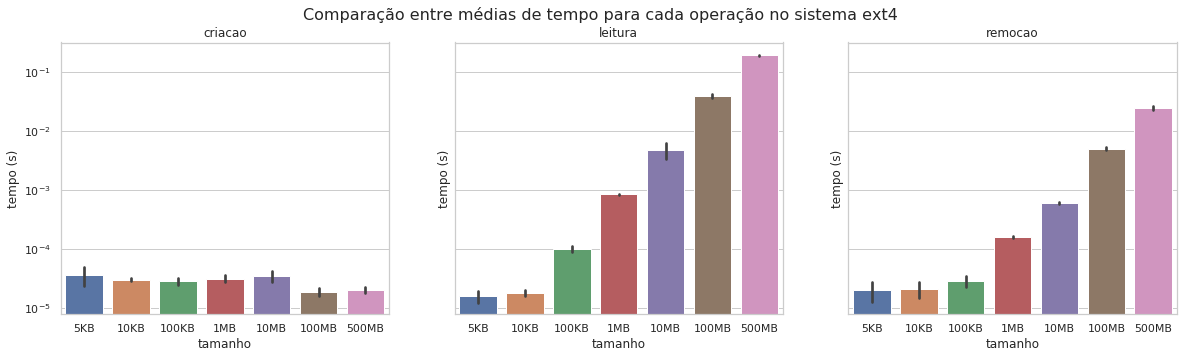

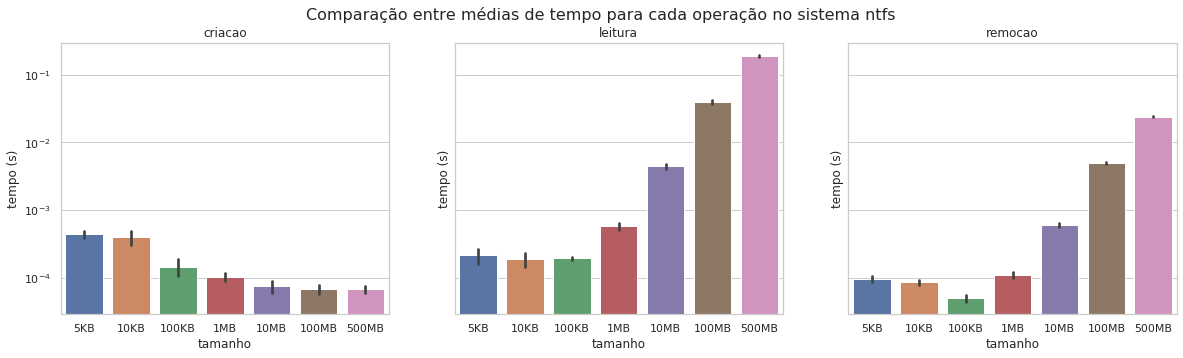

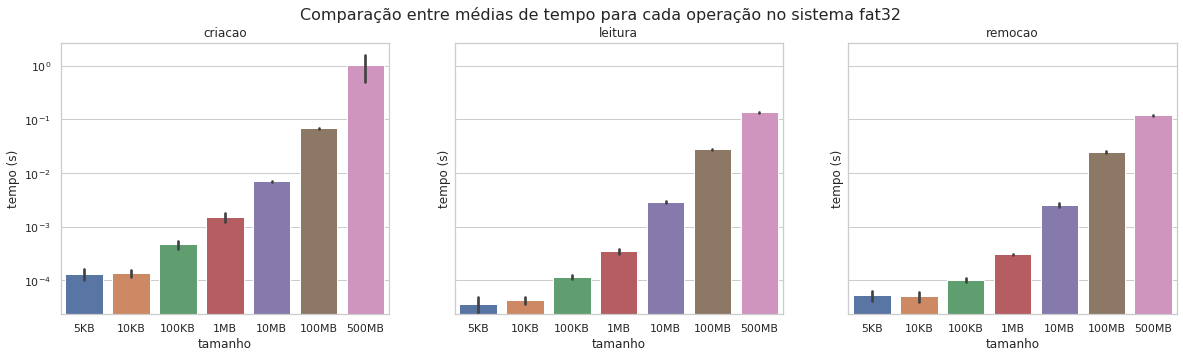

In [12]:
sistemas = dados.sistema.unique()
for sistema in sistemas:
    df = separa_dados(dados, sistema=sistema)
    plota_barras(df, sistema)

Na sequência, decidimos avaliar a estabilidade das operações para um dado tamanho de arquivo (500MB). Nota-se que as operações são estáveis ao longo das iterações para os sistemas `ext4` e `ntfs`. Entretanto, o comportamento de crescimento observado no valor médio do tempo de criação no sistema `fat32` também é refletivo durante as iterações, como demonstra o gráfico abaixo.

/home/rogers/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


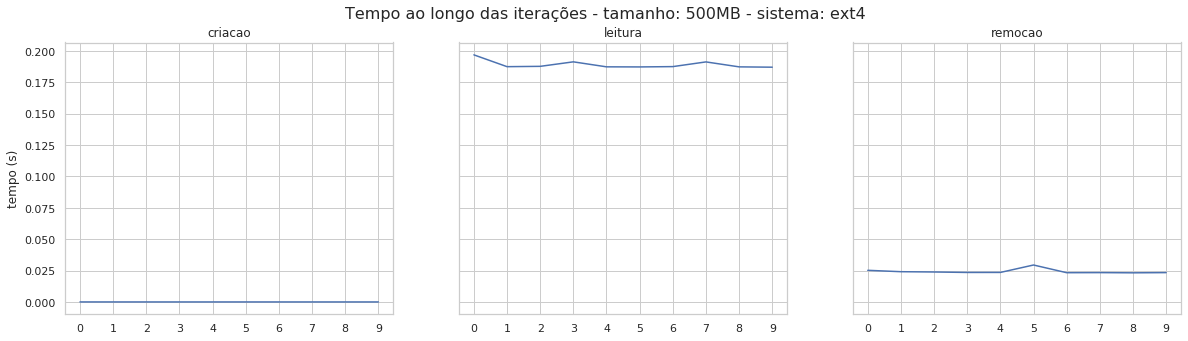

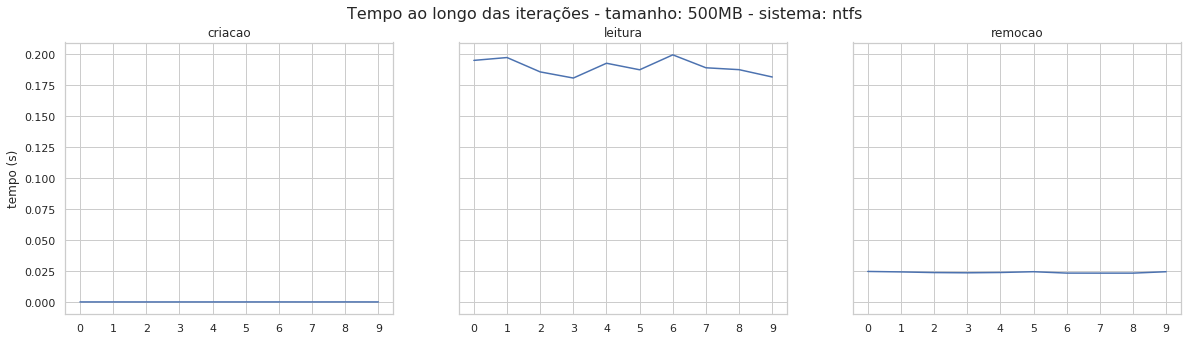

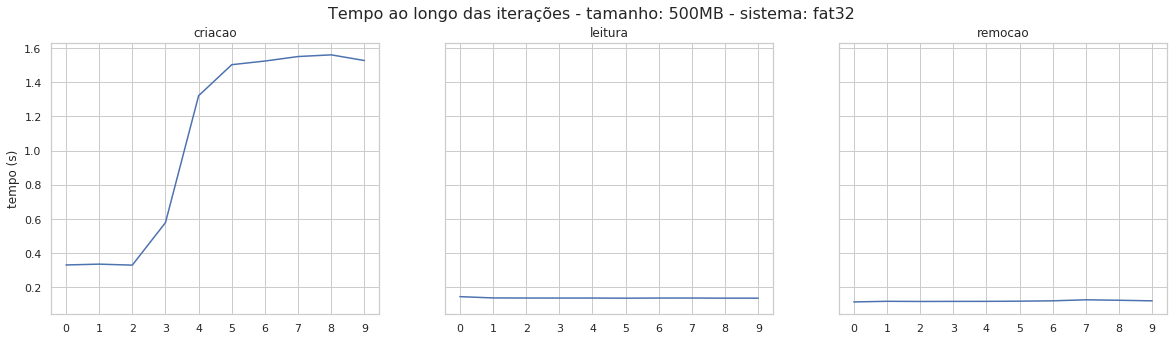

In [13]:
for sistema in sistemas:
    df = separa_dados(dados, sistema=sistema)
    plota_iteracoes(df, sistema, '500MB')

Por fim, selamos a comparação de desempenho com a obtenção da média do tempo de execução em cada sistema, sem distinção por tamanho de arquivo. Como observado nos gráficos anteriores, o sistema `fat32` é muito mais lento que os demais.

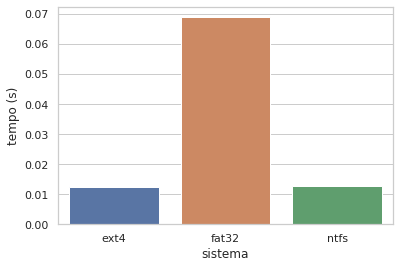

In [15]:
media_criacao = dados.groupby(['sistema'], axis=0).mean()
media_criacao[media_criacao.index.name] = media_criacao.index
media_criacao.reset_index(drop=True, inplace=True)
ax = sns.barplot(x=media_criacao.sistema, y=media_criacao.tempo, data=media_criacao)
ax.set_ylabel("tempo (s)");